<a href="https://www.kaggle.com/code/jeffreyesedo/1st-ribo-note?scriptVersionId=151222394" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# RNA Science Environment and Libraries

In [4]:
# Setting up an RNA Science Environment
!pip install arnie
!pip install draw_rna
!pip install viennarna
!pip install swifter

# Install EternaFold
!conda config --set auto_update_conda false
!conda install -c bioconda eternafold --yes
# Manually setup EternaFold for Kaggle notebook
%env ETERNAFOLD_PATH=/opt/conda/bin/eternafold-bin
%env ETERNAFOLD_PARAMETERS=/opt/conda/lib/eternafold-lib/parameters/EternaFoldParams.v1

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 2.4 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 780.0 kB/s eta 0:00:00:0100:010m
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 136.1 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 1.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 313.0 kB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 573.1 kB/s eta 0:00:000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.7/757.7 kB 1.2 MB/s eta 0:00:0000:0100:01
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=23916ac55962ce6012d9f3b63c6aa2e0002fed6d482d5dd56767adbac5cd9642
  Stored in directory: /home/ikeme/.cache/pip/wheels/ef/7f/bd/9bed48f078f3ee1fa75e0b29b6e0335ce1cb03a38d3443b3a3
Successfully b

In [ ]:
import os
import psutil
import gc
import tqdm
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from tqdm import tqdm as tq
from collections import defaultdict
from concurrent.futures import ThreadPoolExecutor

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# monitor memeory usage
# def memory_usage_in_gb():
#     process = psutil.Process(os.getpid())
#     memory_use_in_bytes = process.memory_info().rss
#     memory_use_in_gb = memory_use_in_bytes / (2. ** 30)
#     return f'Memory usage: {np.round(memory_use_in_gb, 2)} GB'

In [ ]:
import RNA
from arnie.mfe import mfe
from arnie.bpps import bpps
from draw_rna.ipynb_draw import draw_struct

In [ ]:
# ! pip install kaggle

# !mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

# !mkdir -p ~/.kaggle/

# !mv kaggle.json ~/.kaggle/

# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# check file in the competition
! kaggle competitions files stanford-ribonanza-rna-folding

In [6]:
# Download Dataset to colab
# ! kaggle competitions download -c stanford-ribonanza-rna-folding  -f train_data.csv -p /download
# ! kaggle competitions download -c stanford-ribonanza-rna-folding  -f train_data_QUICK_START.csv -p /download
# ! kaggle competitions download -c stanford-ribonanza-rna-folding  -f test_sequences.csv -p /download
# ! kaggle competitions download -c stanford-ribonanza-rna-folding  -f sample_submission.csv -p /download
# ! kaggle competitions download -c stanford-ribonanza-rna-folding  -f supplementary_silico_predictions -p /download
# ! kaggle competitions download -c stanford-ribonanza-rna-folding  -f eterna_openknot_metadata -p /download

In [7]:
# # Unzip datasets
# import zipfile
# import os

# Paths 
# file_paths = ['../sample_submission.csv.zip', 
#               '../test_sequences.csv.zip', 
#               '../train_data_QUICK_START.csv.zip', 
#               '../train_data.csv.zip',
#              './supplementary_silico_predictions',
#              './eterna_openknot_metadata']  
# dest_dir = '../datasets'  

# def unzip_files(file_paths, dest_dir):
#     for file_path in file_paths:
#         with zipfile.ZipFile(file_path, 'r') as zip_ref:
#             zip_ref.extractall(dest_dir)


# unzip_files(file_paths, dest_dir)


# Import Datasets

In [8]:
train= pd.read_csv("/kaggle/input/stanford-ribonanza-rna-folding/train_data.csv")
# train= pd.read_csv("/kaggle/input/stanford-ribonanza-rna-folding/train_data_QUICK_START.csv")
test= pd.read_csv("/kaggle/input/stanford-ribonanza-rna-folding/test_sequences.csv")

# train=pd.read_csv('../datasets/train_data.csv')
# test=pd.read_csv('../datasets/test_sequences.csv')

In [ ]:
eterna_pos= pd.read_csv("/kaggle/input/stanford-ribonanza-rna-folding/eterna_openknot_metadata/Positives240-2000.tsv", sep= "//t")
eterna_puz_132= pd.read_csv("/kaggle/input/stanford-ribonanza-rna-folding/eterna_openknot_metadata/puzzle 12378132.tsv", sep= "//t")
eterna_puz_RYOP50= pd.read_csv("/kaggle/input/stanford-ribonanza-rna-folding/eterna_openknot_metadata/puzzle_11318423_RYOP50_with_description.tsv", sep= "//t")
eterna_puz_RYOP90= pd.read_csv("/kaggle/input/stanford-ribonanza-rna-folding/eterna_openknot_metadata/puzzle_11387276_RYOP90_with_description.tsv", sep= "//t")
eterna_puz_RFAM= pd.read_csv("/kaggle/input/stanford-ribonanza-rna-folding/eterna_openknot_metadata/puzzle_11627601_with_descriptions_PLUS_RFAM.tsv", sep= "//t")
eterna_puz_118= pd.read_csv("/kaggle/input/stanford-ribonanza-rna-folding/eterna_openknot_metadata/puzzle_11836497_with_description.tsv", sep= "//t")

In [9]:
print(f"Train dataset shape: {train.shape}\n")

print(f"Test dataset shape: {test.shape}")

Train dataset shape: (1643680, 419)

Test dataset shape: (1343823, 5)


In [10]:
# optimize numeric data types
def opt_num(df):
    df= df.copy()
    
    for col in df.columns:
        df_col= df[col]
        dn = df_col.dtype.name
        
        if dn == "int64":
            df[col]= pd.to_numeric(df_col, downcast="integer")
        elif dn == "float64":
            df[col]= pd.to_numeric(df_col, downcast="float")
        elif dn == "object":
            num_unique_values = len(df_col.unique())
            num_total_values = len(df_col)
            if num_unique_values / num_total_values < 0.5:
                df[col] = df_col.astype("category")
    return df

In [11]:
opt_train= opt_num(train)
opt_test= opt_num(test)

In [12]:
print(f"Train Dataset:{train.iloc[0:5, 0:10].info()}\n")
print(f"Optimized Dataset: {opt_train.iloc[0:5, 0:10].info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sequence_id      5 non-null      object 
 1   sequence         5 non-null      object 
 2   experiment_type  5 non-null      object 
 3   dataset_name     5 non-null      object 
 4   reads            5 non-null      int64  
 5   signal_to_noise  5 non-null      float64
 6   SN_filter        5 non-null      int64  
 7   reactivity_0001  0 non-null      float64
 8   reactivity_0002  0 non-null      float64
 9   reactivity_0003  0 non-null      float64
dtypes: float64(4), int64(2), object(4)
memory usage: 528.0+ bytes
Train Dataset:None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   sequence_id      5 non-null      category
 1   sequence     

In [13]:
del train
del test
gc.collect()

0

In [14]:
# Export Dataset as Parquet
# opt_train.to_parquet('train_data.parquet')
# opt_test.to_parquet('test_data.parquet')

# Import Parquet Dataset
# train_df = pd.read_parquet('/kaggle/working/train_data.parquet')
# train_df.head()

# Data Exploration and Visualization

In [15]:
opt_train.head()

,sequence_id,sequence,experiment_type,dataset_name,reads,signal_to_noise,SN_filter,reactivity_0001,reactivity_0002,reactivity_0003,...,reactivity_error_0197,reactivity_error_0198,reactivity_error_0199,reactivity_error_0200,reactivity_error_0201,reactivity_error_0202,reactivity_error_0203,reactivity_error_0204,reactivity_error_0205,reactivity_error_0206
0,8cdfeef009ea,GGGAACGACUCGAGUAGAGUCGAAAAACGUUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,2343,0.944,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,51e61fbde94d,GGGAACGACUCGAGUAGAGUCGAAAAACAUUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,5326,1.933,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25ce8d5109cd,GGGAACGACUCGAGUAGAGUCGAAAAACCUUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,4647,2.347,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,07dcfb6d1965,GGGAACGACUCGAGUAGAGUCGAAAAACUUUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,102843,11.824,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e561cc042a4c,GGGAACGACUCGAGUAGAGUCGAAAAACGAUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,7665,3.519,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
print(f"Test Columns: {opt_test.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343823 entries, 0 to 1343822
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   id_min       1343823 non-null  int32 
 1   id_max       1343823 non-null  int32 
 2   sequence_id  1343823 non-null  object
 3   sequence     1343823 non-null  object
 4   future       1343823 non-null  int8  
dtypes: int32(2), int8(1), object(2)
memory usage: 32.0+ MB
Test Columns: None


In [17]:
# Count columns based on their Dtype
# dtype_counts = opt_train.dtypes.value_counts()
# print(dtype_counts)

In [18]:
experiments_count= opt_train["experiment_type"].value_counts()
print(experiments_count)

experiment_type
2A3_MaP    821840
DMS_MaP    821840
Name: count, dtype: int64


sequence           GGGAACGACUCGAGUAGAGUCGAAAAAUGAAAGCGAGAGAGUUUGG...
experiment_type                                              DMS_MaP
Name: 726008, dtype: object
.....((((((.....))))))............(((.(.(((((((......))))))).).)))..(((((.(((.....))(((((..((........))...))))).......).))))).(((((((((((((....))))))))))))).....................


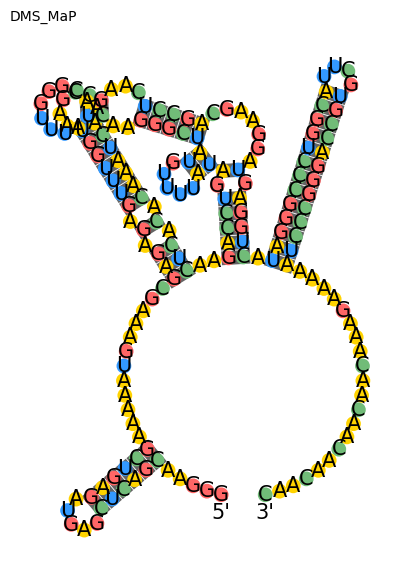

In [19]:
# Visualizing RNA  sequence for DMS MaP
seq_dms = opt_train[opt_train["experiment_type"] == "DMS_MaP"].iloc[322534, 1:3]
print(seq_dms)

structure = mfe(seq_dms.sequence,package="eternafold")
print(structure)

fig, axs = plt.subplots(1,1,  figsize=(8,7))
draw_struct(seq_dms.sequence, structure, ax=axs)
axs.set_title(seq_dms.experiment_type, loc='left', fontsize='medium')
plt.show()

sequence           GGGAACGACUCGAGUAGAGUCGAAAAACGUUGAUAUGGAUUUACUC...
experiment_type                                              2A3_MaP
Name: 200, dtype: object
.....((((((.....))))))......((((((..(((((((((((..(.(((((.....(((((...((((....))))...)))))))))).)....)..))))))))))...)))))).......((((((((....)))))))).....................


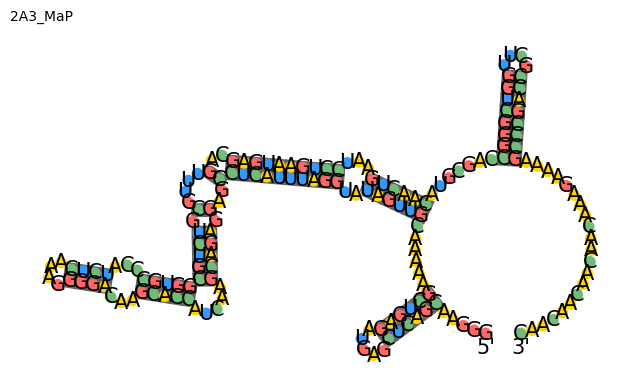

In [20]:
seq_2a3 = opt_train[opt_train["experiment_type"] == "2A3_MaP"].iloc[200, 1:3]
print(seq_2a3)

structure = mfe(seq_2a3.sequence,package="eternafold")
print(structure)

fig, axs = plt.subplots(1,1,  figsize=(8,7))
draw_struct(seq_2a3.sequence, structure, ax=axs)
axs.set_title(seq_2a3.experiment_type, loc='left', fontsize='medium')
plt.show()

Text(0.5, 1.0, 'Sequence lenght Distribution')

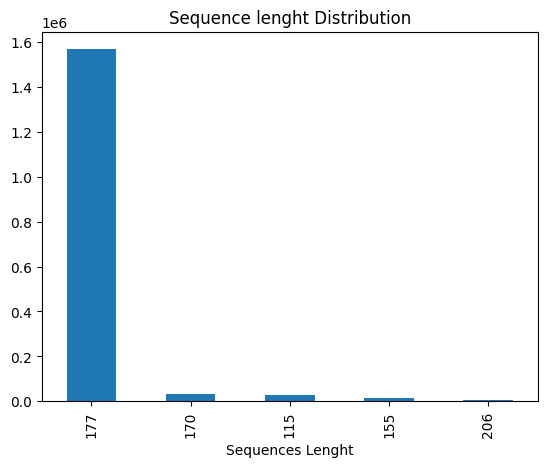

In [21]:
seq_len= opt_train.sequence.apply(len)
seq_len = seq_len.value_counts()
# seq_len = pd.Series(seq_len)
# seq_len

seq_len.plot.bar()
plt.xlabel("Sequences Lenght")
plt.title("Sequence lenght Distribution")

Text(0.5, 1.0, 'Test Sequence lenght Distribution')

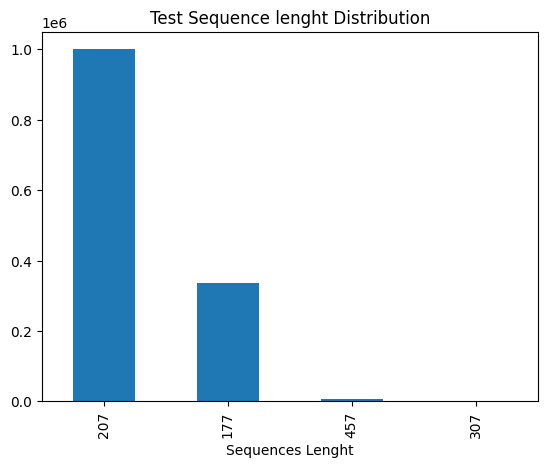

In [22]:
seq_test_len= opt_test.sequence.apply(len)
seq_test_len = seq_test_len.value_counts()
# seq_len = pd.Series(seq_len)
# seq_len

seq_test_len.plot.bar()
plt.xlabel("Sequences Lenght")
plt.title("Test Sequence lenght Distribution")

lengths of RNA sequence is between 115 to 206, while for the test the lengths are between 207 to 457.  Part of the challenge is to know whether the patterns recognized at length 115 to 206 will generalize to longer lengths [response found here.](https://www.kaggle.com/competitions/stanford-ribonanza-rna-folding/discussion/453147#2513582).

Text(0.5, 1.0, 'Base Count')

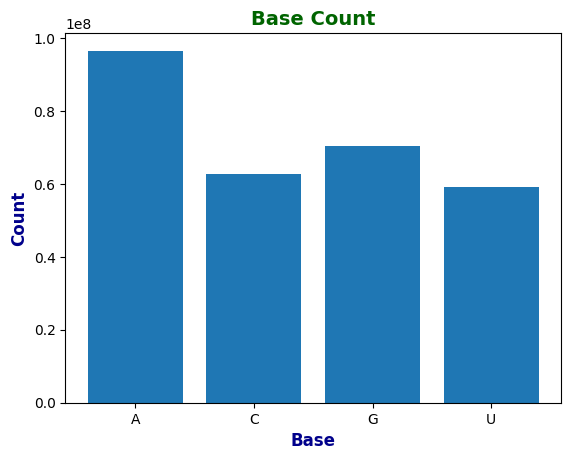

In [23]:
base= {"A": 0,"C":0,"G":0,"U":0}

for seq in opt_train.sequence:
    for base_key in base.keys():
        base[base_key] += seq.count(base_key)


plt.bar(base.keys(), base.values())
plt.xlabel('Base', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.title('Base Count', fontsize = 14, fontweight = 'bold', color = 'darkgreen')

In [24]:
del seq_dms
del seq_2a3
gc.collect()

80

In [25]:
opt_train.reads.describe()

count    1.643680e+06
mean     2.230474e+03
std      2.415467e+04
min      0.000000e+00
25%      4.200000e+01
50%      1.480000e+02
75%      5.260000e+02
max      1.474813e+07
Name: reads, dtype: float64

In [26]:
opt_train.signal_to_noise.describe()

count    1.643680e+06
mean     1.194395e+00
std      2.696888e+00
min     -1.672000e+00
25%      1.090000e-01
50%      3.830000e-01
75%      1.081000e+00
max      2.563710e+02
Name: signal_to_noise, dtype: float64

In [27]:
opt_train.SN_filter.describe()

count    1.643680e+06
mean     2.666206e-01
std      4.421925e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: SN_filter, dtype: float64

In [28]:
# checking number of columns NaN in reactivity and reactivity_error 
float_columns = opt_train.select_dtypes(include=['float'])

# Columns that are NaN
num_empty_cols= 0
cols_having_values=0


# for col in float_columns.drop('signal_to_noise', axis=1):
for col in float_columns:
    if float_columns[col].notna().sum() == 0:
        num_empty_cols+=1
    else:
        cols_having_values+=1
        
print(f"Number of Columns with only NaN values: {num_empty_cols} of 412 columns\n")
print(f"Number of Columns with values: {cols_having_values} of 412 columns")

Number of Columns with only NaN values: 134 of 412 columns

Number of Columns with values: 279 of 412 columns


In [29]:
del float_columns
gc.collect()

0

# Data Wrangling

In [30]:
def wrangle(df):
    
    # Drop duplicate
    df= df.drop_duplicates(subset=["sequence_id", "experiment_type"])
    
    # Drop rows based on SN Filter
    df= df.loc[df.SN_filter == 1]
    
    # Drop SN_filter
    df= df.drop(columns=["SN_filter"], axis=1)
    
    # Set categories for categorical columns
    for col in df.select_dtypes(include="category"):
        df[col] = df[col].cat.add_categories([0])
    # Fill NaN value for reactivity & error
    df= df[7:].fillna(0)
    
    return df

In [31]:
train_feat=  wrangle(opt_train)
train_feat.head()

,sequence_id,sequence,experiment_type,dataset_name,reads,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,...,reactivity_error_0197,reactivity_error_0198,reactivity_error_0199,reactivity_error_0200,reactivity_error_0201,reactivity_error_0202,reactivity_error_0203,reactivity_error_0204,reactivity_error_0205,reactivity_error_0206
8,470c8b446927,GGGAACGACUCGAGUAGAGUCGAAAAACGUCGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,142531,5.465,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,c7712b3f912d,GGGAACGACUCGAGUAGAGUCGAAAAACGUGGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,8934,2.705,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,61a357b74f51,GGGAACGACUCGAGUAGAGUCGAAAAACGUUAAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,49408,4.448,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,db844b9f1869,GGGAACGACUCGAGUAGAGUCGAAAAACGUUCAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,2391,1.295,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,dd685eaf9ce2,GGGAACGACUCGAGUAGAGUCGAAAAACGUUUAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,142375,11.862,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
train_feat.shape

(410698, 418)

In [33]:
del opt_train
gc.collect()

0

# Feature Entraction and Engineering
Uisng just the sequence of the training column won't suffice, so to enrich dataset I will be using the:

- Bpps Thank to [JOCELYN DUMLAO](https://www.kaggle.com/jocelyndumlaohttps://www.kaggle.com/jocelyndumlao)
- Mean of Bpps
<!-- - 3D Coords -->
<!-- - Sequence lib -->
<!-- - forming OpenKnots and the probabity using metadata -->
- Probability codons 
- Mean of probability of codons
<!-- - propbability of forming 2D and 3D structures -->
- sequence length
- Mean reactivity
- secondary structure and its' count [UMAR IGAN](https://www.kaggle.com/code/umar47/rna-folding-reduce-memory-add-features-seq2seq?scriptVersionId=147271807&cellId=31)
- Adjacent Guanines count


to get features for to enrich the dataset.

In [34]:
# lenght of sequence to a column
train_feat["sequnece_len"]= train_feat.sequence.astype(str).apply(len)
opt_test["sequnece_len"]= opt_test.sequence.apply(len)

train_feat

,sequence_id,sequence,experiment_type,dataset_name,reads,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,...,reactivity_error_0198,reactivity_error_0199,reactivity_error_0200,reactivity_error_0201,reactivity_error_0202,reactivity_error_0203,reactivity_error_0204,reactivity_error_0205,reactivity_error_0206,sequnece_len
8,470c8b446927,GGGAACGACUCGAGUAGAGUCGAAAAACGUCGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,142531,5.465,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170
9,c7712b3f912d,GGGAACGACUCGAGUAGAGUCGAAAAACGUGGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,8934,2.705,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170
10,61a357b74f51,GGGAACGACUCGAGUAGAGUCGAAAAACGUUAAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,49408,4.448,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170
11,db844b9f1869,GGGAACGACUCGAGUAGAGUCGAAAAACGUUCAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,2391,1.295,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170
12,dd685eaf9ce2,GGGAACGACUCGAGUAGAGUCGAAAAACGUUUAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,142375,11.862,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643675,7951fb2f47f1,GGGAACGACUCGAGUAGAGUCGAAAAGGAGCGUCGUGUCUCUUGUA...,DMS_MaP,SL5_M2seq_DMS,37530,7.248,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206
1643676,e0dc5823e5e1,GGGAACGACUCGAGUAGAGUCGAAAAGGAGCGUCGUGUCUCUUGUA...,DMS_MaP,SL5_M2seq_DMS,337248,17.902,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206
1643677,0d6036529b42,GGGAACGACUCGAGUAGAGUCGAAAAGGAGCGUCGUGUCUCUUGUA...,DMS_MaP,SL5_M2seq_DMS,44053,6.700,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206
1643678,46d1f07d723b,GGGAACGACUCGAGUAGAGUCGAAAAGGAGCGUCGUGUCUCUUGUA...,DMS_MaP,SL5_M2seq_DMS,108600,11.716,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206


In [35]:
opt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343823 entries, 0 to 1343822
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   id_min        1343823 non-null  int32 
 1   id_max        1343823 non-null  int32 
 2   sequence_id   1343823 non-null  object
 3   sequence      1343823 non-null  object
 4   future        1343823 non-null  int8  
 5   sequnece_len  1343823 non-null  int64 
dtypes: int32(2), int64(1), int8(1), object(2)
memory usage: 42.3+ MB


In [36]:
# Get column names of reactivity and reactivity_error
reactivity_cols= train_feat.columns[train_feat.columns.str.startswith('reactivity_0')]
reactivity_err_cols= train_feat.columns[train_feat.columns.str.startswith('reactivity_err_0')]

reactivity_cols

Index(['reactivity_0001', 'reactivity_0002', 'reactivity_0003',
       'reactivity_0004', 'reactivity_0005', 'reactivity_0006',
       'reactivity_0007', 'reactivity_0008', 'reactivity_0009',
       'reactivity_0010',
       ...
       'reactivity_0197', 'reactivity_0198', 'reactivity_0199',
       'reactivity_0200', 'reactivity_0201', 'reactivity_0202',
       'reactivity_0203', 'reactivity_0204', 'reactivity_0205',
       'reactivity_0206'],
      dtype='object', length=206)

In [37]:
# Get the mean of reactivity columns 
train_feat["react_mean"]= train_feat[reactivity_cols].mean(axis=1)
train_feat

,sequence_id,sequence,experiment_type,dataset_name,reads,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,...,reactivity_error_0199,reactivity_error_0200,reactivity_error_0201,reactivity_error_0202,reactivity_error_0203,reactivity_error_0204,reactivity_error_0205,reactivity_error_0206,sequnece_len,react_mean
8,470c8b446927,GGGAACGACUCGAGUAGAGUCGAAAAACGUCGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,142531,5.465,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170,0.080796
9,c7712b3f912d,GGGAACGACUCGAGUAGAGUCGAAAAACGUGGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,8934,2.705,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170,0.074267
10,61a357b74f51,GGGAACGACUCGAGUAGAGUCGAAAAACGUUAAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,49408,4.448,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170,0.080587
11,db844b9f1869,GGGAACGACUCGAGUAGAGUCGAAAAACGUUCAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,2391,1.295,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170,0.080379
12,dd685eaf9ce2,GGGAACGACUCGAGUAGAGUCGAAAAACGUUUAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,142375,11.862,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170,0.081704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643675,7951fb2f47f1,GGGAACGACUCGAGUAGAGUCGAAAAGGAGCGUCGUGUCUCUUGUA...,DMS_MaP,SL5_M2seq_DMS,37530,7.248,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206,0.231058
1643676,e0dc5823e5e1,GGGAACGACUCGAGUAGAGUCGAAAAGGAGCGUCGUGUCUCUUGUA...,DMS_MaP,SL5_M2seq_DMS,337248,17.902,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206,0.203126
1643677,0d6036529b42,GGGAACGACUCGAGUAGAGUCGAAAAGGAGCGUCGUGUCUCUUGUA...,DMS_MaP,SL5_M2seq_DMS,44053,6.700,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206,0.204772
1643678,46d1f07d723b,GGGAACGACUCGAGUAGAGUCGAAAAGGAGCGUCGUGUCUCUUGUA...,DMS_MaP,SL5_M2seq_DMS,108600,11.716,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206,0.224578


In [38]:
# def calculate_bpps(sequence):
#     """
#     Calculate BPPs for a given RNA sequence.
    
#     Args:
#         sequence (str): The RNA sequence.
        
#     Returns:
#         dict: A dictionary containing BPPs.
#     """
#     return bpps(sequence, package="eternafold")

# import RNA

# def sec_structure_prob(seq):
#     # Calculate and return base pair probabilities and structure
#     sec_structure, bpps = RNA.fold(seq)
    
#     return sec_structure, bpps

In [39]:
train_sequence= train_feat.sequence.to_list()
test_sequence= opt_test.sequence.to_list()

In [44]:
# %%time

# Get the structure and Base pair probability from trian dataset to csv
# train_sec_bpps= []

# for seq in train_feat.sequence.iloc[0:]:
#     train_sec_bpps.append(RNA.fold(seq))

# train_struc_bpps= pd.DataFrame(train_sec_bpps, columns= ["sec_structure", "Bpps"])

# train_struc_bpps.to_csv("train_struc_bpps.csv")

# train_sec_bpps.shape

# train_sec_bpps[0:5]

In [ ]:
%%time

# Get the structure and Base pair probability from test dataset to csv
test_list_struc_bpps= []

for seq in opt_test.sequence:
    test_list_struc_bpps.append(RNA.fold(seq))

test_struc_bpps= pd.DataFrame(test_list_struc_bpps, columns= ["sec_structure", "bpps"])

test_struc_bpps.to_csv("test_struc_bpps.csv")


In [ ]:
# def struc_bpps(seq):
    
#     list_struc_bpps= [RNA.fold(s) for s in seq]

#     struc_bpps= pd.DataFrame(list_struc_bpps, columns= ["sec_structure", "bpps"])

#     struc_bpps.to_csv("struc_bpps.csv")

In [ ]:
# import structure and bpps to data

train_struc_bpps= pd.read_csv("train_struc_bpps.csv")
test_struc_bpps= pd.read_csv("test_struc_bpps.csv")

print(f"train extracted features shape: {test_struc_bpps.shape}\ntest extracted features shape {"test_struc_bpps"}")

In [ ]:
# Calculate mean BPPs

# train_struc_bpps["avg_bpps"]= train_seq_bpp.mean(axis=1)
# test_struc_bpps["avg_bpps"] = test_seq_bpp.mean(axis=1)


train_struc_bpps["avg_bpps"] = sum(sum(train_struc_bpps.bpps)) / (len(train_struc_bpps.sequence) * (len(train_struc_bpps.sequence) - 1) / 2)
test_struc_bpps["avg_bpps"] = sum(sum(test_struc_bpps.bpps)) / (len(test_struc_bpps.sequence) * (len(test_struc_bpps.sequence) - 1) / 2)

# print(f"Train dataset shape: {train_struc_bpps}")
# print(f"Test dataset shape: {test_struc_bpps}")

In [ ]:
# Function to count parentheses
def count_parentheses(structure_string):
    count = structure_string.count(")")
    return count

# Apply the function to the DataFrame column

tq.pandas()
train_struc_bpps['parentheses_counts'] = train_struc_bpps['sec_structure'].astype(str).apply(count_parentheses)
test_struc_bpps['parentheses_counts'] = test_struc_bpps['sec_structure'].astype(str).apply(count_parentheses)

In [ ]:
# check the code
! conda install rnastructure

import RNAstructure

# Initialize the RNAstructure object
rna = [RNAstructure.RNA.fromString(s) for s in feature.sequence[0:5]]

# Calculate the base pair bond strength
bp_strength = [s.GetPairBondEnergy(s) for s in rna]

print(f"The base pair bond strength of the RNA sequence {feature.sequence[0]} is {bp_strength[0]:.2f} kcal/mol.")

In [ ]:
# Define function to calculate Base pair Strenght to csv using RNAstructure library
import RNAstructure

def pair_strength(seq):
    # Initialize the RNAstructure object
    rna = [RNAstructure.RNA.fromString(s) for s in seq]

    # Calculate the base pair bond strength
    bond_energy = [s.GetPairBondEnergy(s) for s in rna]   
    bp_strength= pd.Series(bond_energy)
    
    return bp_strength
    

train_struc_bpps["bp_strength"] = pair_strenght(train_feat.sequence)
test_struc_bpps["bp_strength"] = pair_strenght(opt_test.sequence)

train_struc_bpps.to_csv("train_struc_bpps.csv")
test_struc_bpps.to_csv("test_struc_bpps.csv")

In [ ]:
# Calculate codon probabilities
codon_probs = train_feat.sequence.iloc[0:5].apply(RNA.codon_prob)
# codon_probs = [RNA.codon_prob(seq) for s in feature.sequence[0:5]]

# Calculate mean codon probability
mean_codon_prob = sum(codon_probs.values()) / len(codon_probs)

# Print the codon probabilities
print(f" Codon Probability: {codon_probs} \nMean of Probability: {mean_codon_prob}")


In [ ]:
# Define functionto calculate codon probabiltiy
def codon_probs_mean(seq):
#     probs = seq.apply(RNA.codon_prob)
    probs = [RNA.codon_prob(seq) for s in seq]
    mean_probs= sum(probs.values()) / len(probs)
    probs_mean= pd.DataFrame({"probs":probs, "mean_probs": mean_probs})
    
    return probs_mean


train_condon_probs_mean= codon_probs_mean(train_feat.sequence)
train_condon_probs_mean.to_csv("train_condon_probs_mean.csv")

test_condon_probs_mean= codon_probs_mean(opt_test.sequence)
test_condon_probs_mean.to_csv("test_condon_probs_mean.csv")

In [ ]:
# test of code
seq= train_feat.sequence.iloc[:5]
# Count the number of adjacent guanines
gg_seq_num= []
for s in seq:
    gg_seq_num.append(gg_count = 0)
    for i in range(len(s) - 1):
        if s[i:i+2] == "GG" or "GGG":
            gg_count += 1

# Print the count
print(gg_seq_num)

In [ ]:
# function to count adjacent guanines

def gg_count(seq):
    """
    Returns:
    list of adjcent gg or ggg counts for each sequence
    """
    adj_guanine= []
    # Count the number of adjacent guanines
    for s in seq:
    adj_guanine.append(gg_count = 0)
    for i in range(len(s) - 1):
        if s[i:i+2] == "GG" or "GGG":
            gg_count += 1
            
    return gg_seq_num


train_struc_bpps["adj_guanine"]= gg_count(train_feat.sequence)
test_struc_bpps["adj_guanine"]= gg_count(opt_test.sequence)

In [ ]:
# Concatenate All features to one Dataset called features and test_features

features= pd.concat([train_feat,train_struc_bpps, train_condon_probs_mean])
test_features= pd.concat([opt_test,test_struc_bpps,test_condon_probs_mean])

In [ ]:
del train_feat
del opt_test
del train_struc_bpps
del test_struc_bpps
del train_condon_probs_mean
del test_condon_probs_mean

gc.collect()

# Building Model

In [ ]:
from keras.models import Model
from keras.layers import Dense, Conv1D, Flatten, Input, concatenate

# sequence input (assuming one-hot encoded sequences of length 4)
sequence_input = Input(shape=(None, 4))
conv1 = Conv1D(64, kernel_size=3, activation='relu')(sequence_input)
conv2 = Conv1D(32, kernel_size=3, activation='relu')(conv1)
flat = Flatten()(conv2)

# numerical/categorical input
numerical_input = Input(shape=(4,))
dense1 = Dense(32, activation='relu')(numerical_input)

# concatenate sequence and numerical inputs
concat = concatenate([flat, dense1])

# output layer
output = Dense(1, activation='sigmoid')(concat)

# create a model
model = Model(inputs=[sequence_input, numerical_input], outputs=output)

# compile model using MAE as a measure of model performance
model.compile(optimizer='adam', loss='mean_absolute_error')
